In [218]:
import pandas as pd
import numpy as np

In [219]:
data = pd.read_csv('netflix.csv', sep = ',', header = 0)
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [220]:
drop_col = data.columns[data.isnull().sum()/len(data) > 0.15].tolist()
drop_col

['director']

In [221]:
data.drop(drop_col, axis = 1, inplace = True)

In [222]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)

In [223]:
def one_hot_encoding(data:pd.DataFrame, col:str)->pd.DataFrame:
    '''This function will apply one hot encoding for a given dataframe and column name'''
    data.reset_index(drop = True, inplace = True)
    data_list = data[col].apply(lambda x: x.split(','))
    #print(data_list)
    data_list =data_list.apply(lambda x: [i.strip() for i in x])
    #print(data_list)
    data_list_unique = []
    for lst in data_list.values:
        for val in lst:
            if val not in data_list_unique:
                data_list_unique.append(val)
    data_mat = np.zeros((len(data_list), len(data_list_unique)))
    data_mat_df = pd.DataFrame(data_mat, columns=data_list_unique)
    #print(data_mat_df)
    for idx, cons in enumerate(data_list.values):
        for con in cons:
            data_mat_df.loc[idx, con] = 1
    data.drop(col, axis = 1, inplace = True)
    try:
        assert len(data) == len(data_mat_df)
        con_data = pd.concat([data, data_mat_df], axis = 1, join = 'outer')
        return con_data, data_mat_df.columns
    except AssertionError:
        print('Concatenation of two dataframes could not happen')

In [224]:
con_data,con_cols = one_hot_encoding(data, 'country')

In [225]:
con_data

,show_id,type,title,cast,date_added,release_year,rating,duration,listed_in,description,...,Vatican City,Ukraine,Jamaica,Lithuania,Afghanistan,Somalia,Sudan,Panama,East Germany,Montenegro
0,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7286,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7287,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7288,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
print(con_data.shape)
print(con_cols)

(7290, 126)
Index(['South Africa', 'India', 'United States', 'Ghana', 'Burkina Faso',
       'United Kingdom', 'Germany', 'Ethiopia', 'Czech Republic', 'Mexico',
       ...
       'Vatican City', 'Ukraine', 'Jamaica', 'Lithuania', 'Afghanistan',
       'Somalia', 'Sudan', 'Panama', 'East Germany', 'Montenegro'],
      dtype='object', length=116)


In [126]:
listed_in_data, listed_in_cols = one_hot_encoding(con_data, 'listed_in')

In [10]:
listed_in_data.shape

(7290, 167)

In [166]:
listed_in_data

,show_id,type,title,cast,date_added,release_year,rating,duration,description,South Africa,...,LGBTQ Movies,TV Horror,Stand-Up Comedy,TV Shows,Movies,Sports Movies,Classic & Cult TV,TV Thrillers,Science & Nature TV,Stand-Up Comedy & Talk Shows
0,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7285,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","March 9, 2016",2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7286,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7287,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...","November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7288,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# which country has maximum number movies released

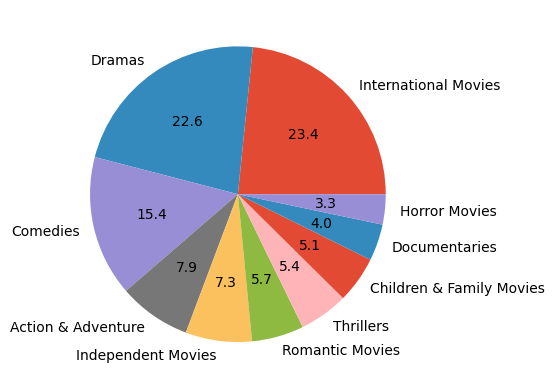

In [201]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
plt.style.use('ggplot')
listed_in_data.loc[listed_in_data.type == 'Movie', listed_in_cols].sum().sort_values(ascending = False)[:10].plot(kind='pie',autopct='%.1f');

In [175]:
year = listed_in_data.loc[listed_in_data.type == 'TV Show', 'release_year'].value_counts().index[1]
year

2019

In [14]:
listed_in_data.loc[listed_in_data.release_year == year, 'type'].value_counts()

type
Movie      513
TV Show    309
Name: count, dtype: int64

In [46]:
listed_in_data.head()

,show_id,type,title,cast,date_added,release_year,rating,duration,description,South Africa,...,LGBTQ Movies,TV Horror,Stand-Up Comedy,TV Shows,Movies,Sports Movies,Classic & Cult TV,TV Thrillers,Science & Nature TV,Stand-Up Comedy & Talk Shows
0,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s9,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...","September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
seasons_df = listed_in_data.loc[(listed_in_data.release_year == year) & (listed_in_data.type == 'TV Show'), ['duration', 'title']]
print(seasons_df)
seasons = seasons_df['duration'].value_counts()
seasons

        duration                   title
151    3 Seasons        Wheel of Fortune
178     1 Season       The Crowned Clown
250   10 Seasons        The Walking Dead
258    5 Seasons             Chicago Med
276     1 Season        Her Private Life
...          ...                     ...
4910    1 Season               7 (Seven)
5794   2 Seasons               I'm Sorry
5855   2 Seasons               Jeopardy!
6092    1 Season  Married at First Sight
6710    1 Season             Super Bheem

[309 rows x 2 columns]


duration
1 Season      185
2 Seasons      57
3 Seasons      33
5 Seasons      12
4 Seasons       6
10 Seasons      3
7 Seasons       3
6 Seasons       3
8 Seasons       3
13 Seasons      2
9 Seasons       1
15 Seasons      1
Name: count, dtype: int64

In [ ]:
seasons_int_list = sorted([int(i.strip()[:2]) for i in seasons.index])
seasons_max = seasons_int_list[-1]
seasons_min = seasons_int_list[0]
print(seasons_max, seasons_min)

In [ ]:
seasons_df.loc[seasons_df.duration == str(seasons_max) + ' Seasons', 'title']

In [ ]:
listed_in_data.loc[:, ['release_year', 'type']].groupby(['release_year']).count()

In [ ]:
listed_in_data_us = listed_in_data.loc[listed_in_data['United States'] == 1, :]
pd.crosstab(listed_in_data_us['release_year'], listed_in_data_us.type).plot(kind = 'line')

In [ ]:
listed_in_data['date_added']

In [ ]:
listed_in_data['date_added'] = pd.to_datetime(listed_in_data['date_added'], format = 'mixed')

In [ ]:
listed_in_data['months'] = listed_in_data['date_added'].dt.month_name()

In [ ]:
temp_month_movie = listed_in_data.loc[:, ['type','months']]
temp_cross_df = pd.crosstab(temp_month_movie.months, temp_month_movie.type)
temp_cross_df


In [ ]:
new_order = ['January', 'February', 'March', 'April', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp_cross_df_new = temp_cross_df.reindex(new_order, axis = 0)

In [ ]:
temp_cross_df_new.plot(kind = 'bar')